In [1]:
# Notebook library imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# %load get_data.py
def get_data() :
    
    import pandas as pd
    
    csv_beer = pd.read_csv("/home/grimoire/Projects/BeerRatings/rating_update.csv")
    beer_ratings = pd.DataFrame(csv_beer)
    
    return beer_ratings


In [3]:
beer_ratings = get_data()

In [4]:
beer_ratings.keys()

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [5]:
len(beer_ratings.brewery_name.unique())

5745

In [6]:
len(beer_ratings.review_profilename.unique())

33388

In [7]:
len(beer_ratings.beer_style.unique())

103

In [8]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
beer_ratings.loc[:,['review_overall','review_aroma','review_appearance',
                    'review_palate','review_taste','beer_abv']].describe()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
count,1586614.00,1586614.00,1586614.00,1586614.00,1586614.00,1586614.00
mean,3.82,3.74,3.84,3.74,3.79,7.00
std,0.72,0.70,0.62,0.68,0.73,2.30
min,0.00,1.00,0.00,1.00,1.00,0.01
25%,3.50,3.50,3.50,3.50,3.50,5.20
50%,4.00,4.00,4.00,4.00,4.00,6.50
75%,4.50,4.00,4.00,4.00,4.50,8.50
max,5.00,5.00,5.00,5.00,5.00,57.70


In [9]:
beer_ratings.keys()

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [10]:
reviews = beer_ratings.loc[:,['review_profilename', 'beer_name', 'brewery_name', 'beer_style']]

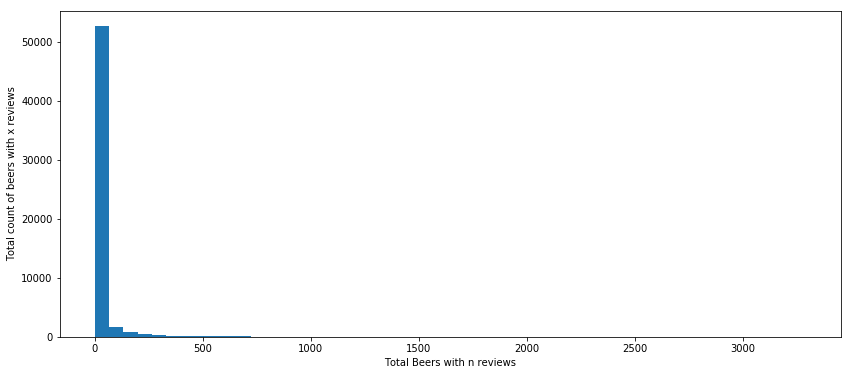

,review_profilename
count,56857.00
mean,27.91
std,122.20
min,1.00
25%,1.00
50%,3.00
75%,9.00
max,3290.00


In [11]:
# beer_review_counts is a series with an index by beer name, 
# and a count of how many reviews that the beer has under 'review_profilename'

beer_review_counts = reviews.loc[:,['beer_name', 'review_profilename']].groupby(['beer_name'], axis=0).count()

# Histogram of beer_review_counts
plt.figure(figsize=[14,6])
plt.hist(beer_review_counts['review_profilename'].values,  bins=50)
plt.xlabel('Total Beers with n reviews')
plt.ylabel('Total count of beers with x reviews')
plt.show()

beer_review_counts.describe()

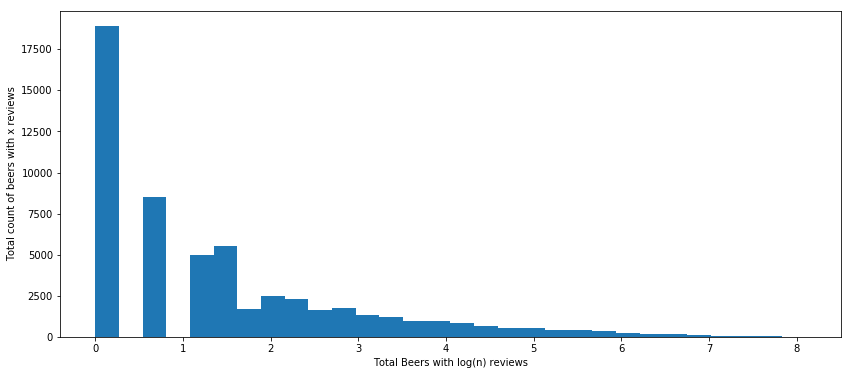

In [12]:
# Histogram of log(beer_review_counts)
plt.figure(figsize=[14,6])
plt.hist(np.log(beer_review_counts[beer_review_counts['review_profilename'] >= 1].values),  bins=30)
plt.xlabel('Total Beers with log(n) reviews')
plt.ylabel('Total count of beers with x reviews')
plt.show()

# There is a beer with a total review count of 0, 

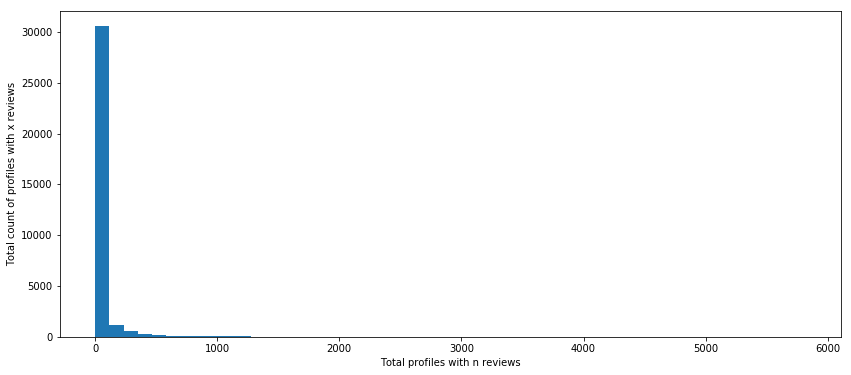

,beer_name
count,33388.00
mean,47.52
std,182.60
min,1.00
25%,1.00
50%,3.00
75%,16.00
max,5817.00


In [13]:
# review_profile_total is a series with an index by 'review_profilename', 
# and a count of how many reviews that profile has under 'beer_name'
review_profile_total = reviews.loc[:,['beer_name', 'review_profilename']].groupby(['review_profilename'], axis=0).count()

# Histogram of review_profile_total
plt.figure(figsize=[14,6])
plt.hist(review_profile_total['beer_name'].values,  bins=50)
plt.xlabel('Total profiles with n reviews')
plt.ylabel('Total count of profiles with x reviews')
plt.show()

review_profile_total.describe()

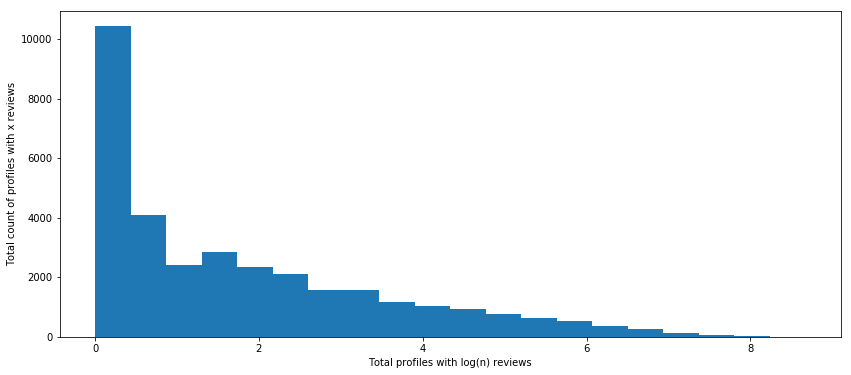

In [14]:
# Histogram of beer_review_counts
plt.figure(figsize=[14,6])
plt.hist(np.log(review_profile_total['beer_name'].values),  bins=20)
plt.xlabel('Total profiles with log(n) reviews')
plt.ylabel('Total count of profiles with x reviews')
plt.show()

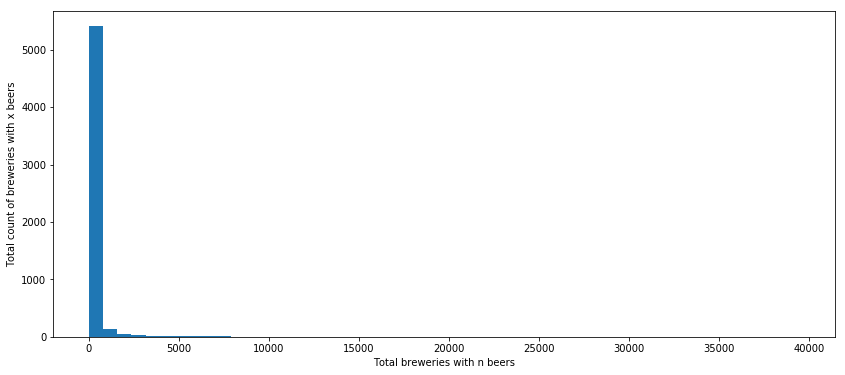

,beer_name
count,5745.00
mean,276.17
std,1500.06
min,1.00
25%,3.00
50%,14.00
75%,73.00
max,39444.00


In [15]:
# beers_per_brewery is a series with an index by 'brewery_name', 
# and a count of how many beers that brewery has under 'beer_name'
beers_per_brewery = reviews.loc[:,['brewery_name', 'beer_name']].groupby('brewery_name', axis=0).count()

# Histogram of review_profile_total
plt.figure(figsize=[14,6])
plt.hist(beers_per_brewery['beer_name'].values,  bins=50)
plt.xlabel('Total breweries with n beers')
plt.ylabel('Total count of breweries with x beers')
plt.show()

beers_per_brewery.describe()

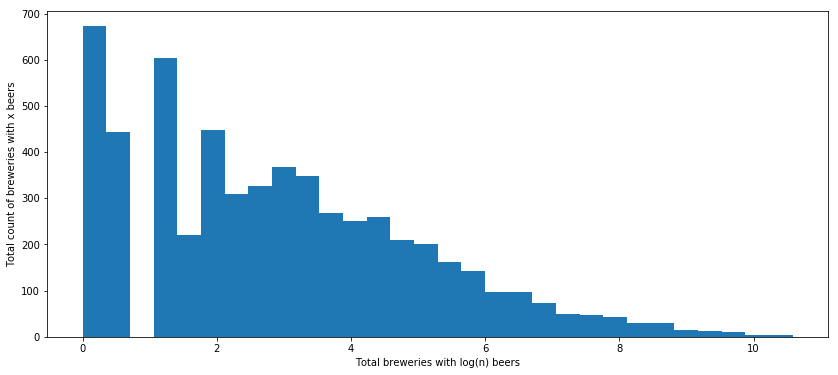

In [16]:
plt.figure(figsize=[14,6])
plt.hist(np.log(beers_per_brewery['beer_name'].values),  bins=30)
plt.xlabel('Total breweries with log(n) beers')
plt.ylabel('Total count of breweries with x beers')
plt.show()

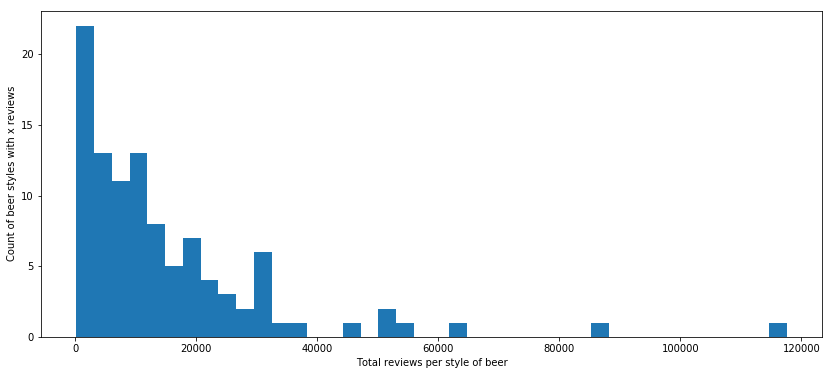

,beer_name
count,103.00
mean,15404.02
std,17918.36
min,241.00
25%,4000.00
50%,10130.00
75%,19757.50
max,117586.00


In [17]:
# beers_style_counts is a series with an index by 'beer_style', 
# and a count of how many beers of that style under 'beer_name'

beer_style_counts = reviews.loc[:,['beer_style', 'beer_name']].groupby('beer_style').count()

# Histogram of
plt.figure(figsize=[14,6])
plt.hist(beer_style_counts['beer_name'].values, bins=40)
plt.xlabel('Total reviews per style of beer')
plt.ylabel('Count of beer styles with x reviews')
plt.show()

beer_style_counts.describe()

### Brewery and beer name and style review comparisons

In [18]:
comparisons = beer_ratings.loc[:,['beer_name', 'brewery_name', 'beer_style', 
                                  'review_overall', 'review_taste', 'review_appearance', 'review_palate', 'review_aroma']]

### Beer style comparisons aggregated by mean

In [19]:
comparison_style = comparisons.loc[:,['beer_style', 'review_overall', 'review_taste', 'review_appearance', 
                                    'review_palate', 'review_aroma']].groupby('beer_style').mean()

In [20]:
beer_style_counts = beer_style_counts.rename({'beer_name':'count'}, axis=1)
comparison_style = comparison_style.merge(beer_style_counts, left_index=True, right_index=True)

In [21]:
comparison_style[comparison_style.review_overall == comparison_style.review_overall.max()]

,review_overall,review_taste,review_appearance,review_palate,review_aroma,count
beer_style,,,,,,
American Wild Ale,4.09,4.15,4.01,4.04,4.13,17794


In [22]:
comparison_style[comparison_style.review_overall == comparison_style.review_overall.min()]

,review_overall,review_taste,review_appearance,review_palate,review_aroma,count
beer_style,,,,,,
Low Alcohol Beer,2.58,2.46,2.92,2.52,2.46,1201


In [23]:
comparison_style.describe()

,review_overall,review_taste,review_appearance,review_palate,review_aroma,count
count,103.00,103.00,103.00,103.00,103.00,103.00
mean,3.73,3.70,3.76,3.66,3.63,15404.02
std,0.30,0.38,0.31,0.34,0.40,17918.36
min,2.58,2.27,2.43,2.34,2.17,241.00
25%,3.69,3.58,3.66,3.55,3.46,4000.00
50%,3.82,3.75,3.83,3.72,3.71,10130.00
75%,3.90,3.95,3.96,3.89,3.90,19757.50
max,4.09,4.21,4.21,4.12,4.16,117586.00


### Brewery comparisons aggregated by mean

In [24]:
comparisons.keys()

Index(['beer_name', 'brewery_name', 'beer_style', 'review_overall',
       'review_taste', 'review_appearance', 'review_palate', 'review_aroma'],
      dtype='object')

In [25]:
comparison_brewery = comparisons.loc[:,['brewery_name', 'review_overall', 'review_taste', 'review_appearance', 
                                    'review_palate', 'review_aroma']].groupby('brewery_name').mean()

In [26]:
beers_per_brewery = beers_per_brewery.rename({'beer_name':'brewery_rating_counts'}, axis=1)

In [27]:
comparison_brewery = comparison_brewery.merge(beers_per_brewery, left_index=True, right_index=True)

In [28]:
comparison_brewery.describe()

,review_overall,review_taste,review_appearance,review_palate,review_aroma,brewery_rating_counts
count,5745.00,5745.00,5745.00,5745.00,5745.00,5745.00
mean,3.53,3.45,3.58,3.43,3.41,276.17
std,0.54,0.55,0.45,0.51,0.51,1500.06
min,1.00,1.00,1.00,1.00,1.00,1.00
25%,3.25,3.17,3.37,3.17,3.15,3.00
50%,3.62,3.53,3.67,3.50,3.50,14.00
75%,3.89,3.82,3.88,3.77,3.75,73.00
max,5.00,5.00,5.00,5.00,5.00,39444.00


In [29]:
comparison_brewery[comparison_brewery.review_overall == comparison_brewery.review_overall.max()]

,review_overall,review_taste,review_appearance,review_palate,review_aroma,brewery_rating_counts
brewery_name,,,,,,
Bad Wörishofer Lowenbrau / Privatbrauerei Hotel Braugasthof,5.00,4.50,4.00,4.00,4.00,1
Binghams Brewery,5.00,5.00,4.50,4.50,5.00,1
Brasserie Oxymore,5.00,4.50,4.50,4.00,4.50,1
Brauerei Gasthof Pfister GmbH,5.00,4.50,5.00,4.50,3.00,1
Brauerei Gundel,5.00,4.50,5.00,5.00,4.50,1
Edsten Brewing Company,5.00,4.75,5.00,5.00,4.75,2
Elizabeth Street Brewery,5.00,5.00,4.50,4.50,4.50,1
Facer's Flintshire Brewery,5.00,4.00,4.00,4.00,4.00,1
Hakone Beer,5.00,5.00,4.00,3.50,4.00,1


In [30]:
comparison_brewery[comparison_brewery.review_overall == comparison_brewery.review_overall.min()]

,review_overall,review_taste,review_appearance,review_palate,review_aroma,brewery_rating_counts
brewery_name,,,,,,
Bières De Carcassonne,1.00,1.00,1.00,1.00,1.00,1
Cervejaria Bruge,1.00,1.00,3.50,2.50,1.50,1
Dednovo Brewery,1.00,1.00,2.00,1.00,1.00,1
Hakodate Beer,1.00,2.00,3.00,3.00,2.00,1
Hayashibune Yakurai Beer,1.00,1.00,3.00,2.00,2.00,1
Jyohana Beer,1.00,1.50,3.00,1.00,1.00,1
Landskron Brauerei,1.00,2.00,3.50,1.50,1.50,1
Miyamori Brauhaus,1.00,1.00,1.00,1.00,1.00,1
Murphy's Wagon Wheel,1.00,1.00,3.00,1.50,2.00,2


### Beer comparisons (by name) aggregated by mean

In [31]:
comparison_beer = comparisons.loc[:,['beer_name', 'review_overall', 'review_taste', 'review_appearance', 
                                    'review_palate', 'review_aroma']].groupby('beer_name').mean()

In [32]:
beer_review_counts = beer_review_counts.rename({'review_profilename':'total_reviews'}, axis=1)
comparison_beer = comparison_beer.merge(beer_review_counts, left_index=True, right_index=True)

In [33]:
comparison_beer.describe()

,review_overall,review_taste,review_appearance,review_palate,review_aroma,total_reviews
count,56857.00,56857.00,56857.00,56857.00,56857.00,56857.00
mean,3.65,3.60,3.68,3.57,3.55,27.91
std,0.62,0.63,0.51,0.58,0.59,122.20
min,1.00,1.00,1.00,1.00,1.00,1.00
25%,3.42,3.32,3.50,3.27,3.25,1.00
50%,3.75,3.70,3.75,3.67,3.59,3.00
75%,4.00,4.00,4.00,4.00,4.00,9.00
max,5.00,5.00,5.00,5.00,5.00,3290.00


In [34]:
comparison_beer[comparison_beer.review_overall == comparison_beer.review_overall.max()]

,review_overall,review_taste,review_appearance,review_palate,review_aroma,total_reviews
beer_name,,,,,,
"""Best Of Both Worlds"" Stout",5.00,5.00,4.50,3.50,4.50,1
'99 Wee Heavy Scotch Ale,5.00,4.75,5.00,5.00,4.50,2
10th Anniversary Bock-style Red Fox,5.00,5.00,4.00,5.00,4.50,1
10th Anniversary Strong Belgian,5.00,5.00,3.00,5.00,5.00,1
2005 Grand Cru,5.00,5.00,4.50,4.50,4.50,1
2006 Barley Wine (Triple IPA),5.00,4.50,4.50,4.50,4.00,1
3 Threads,5.00,5.00,3.50,4.50,4.00,1
3X IPA,5.00,4.50,4.00,5.00,4.00,1
508 Montezuma Imperial Stout,5.00,5.00,5.00,5.00,4.50,1


In [35]:
comparison_beer[comparison_beer.review_overall == comparison_beer.review_overall.min()]

,review_overall,review_taste,review_appearance,review_palate,review_aroma,total_reviews
beer_name,,,,,,
'Nilla Stout,1.00,1.00,4.00,1.00,3.00,1
A Bisto De Nas,1.00,1.00,1.00,1.00,1.00,1
Akashi Kaigan Beer,1.00,1.00,2.00,1.75,2.00,2
Ambar Green,1.00,2.00,2.00,1.50,1.50,1
Animée Clear Beer,1.00,2.00,1.50,1.50,1.00,1
Antarctica Chopp Claro,1.00,1.50,2.00,1.00,1.00,1
Apa,1.00,1.50,2.00,1.50,1.50,1
Archipelago Trader's Brown Ale,1.00,1.00,2.00,2.00,1.50,1
Arctic Experience,1.00,1.50,3.00,1.50,1.00,1


### Reviewer ratings aggregated by mean

In [36]:
beer_ratings.keys()

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [37]:
comparison_profile = beer_ratings.loc[:,['review_overall',
       'review_aroma', 'review_appearance', 'review_profilename',
       'review_palate', 'review_taste']]

In [38]:
comparison_profile = comparison_profile.groupby('review_profilename').mean()

In [39]:
review_profile_total = review_profile_total.rename({'beer_name':'total_profile_reviews'}, axis=1)

In [40]:
comparison_profile = comparison_profile.merge(review_profile_total, left_index=True, right_index=True)

In [41]:
comparison_profile.describe()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,total_profile_reviews
count,33388.00,33388.00,33388.00,33388.00,33388.00,33388.00
mean,3.94,3.80,3.92,3.80,3.92,47.52
std,0.66,0.65,0.54,0.63,0.70,182.60
min,1.00,1.00,1.00,1.00,1.00,1.00
25%,3.69,3.50,3.69,3.50,3.64,1.00
50%,4.00,3.86,4.00,3.87,4.00,3.00
75%,4.33,4.13,4.21,4.08,4.33,16.00
max,5.00,5.00,5.00,5.00,5.00,5817.00


In [42]:
comparison_profile[comparison_profile.review_overall == comparison_profile.review_overall.max()]

,review_overall,review_aroma,review_appearance,review_palate,review_taste,total_profile_reviews
review_profilename,,,,,,
01Ryan10,5.00,5.00,4.50,5.00,5.00,1
103stiga,5.00,5.00,5.00,4.00,5.00,1
1100.0,5.00,4.00,4.00,4.50,5.00,1
13smurrf,5.00,5.00,5.00,5.00,5.00,1
17202826.0,5.00,5.00,5.00,5.00,5.00,1
187.0,5.00,5.00,5.00,5.00,5.00,1
196osh,5.00,4.50,4.50,4.00,5.00,1
1Mainebrew,5.00,4.50,4.50,4.50,4.50,1
1badcableguy,5.00,3.50,4.00,4.00,4.00,1


In [43]:
comparison_profile[comparison_profile.review_overall == comparison_profile.review_overall.min()]

,review_overall,review_aroma,review_appearance,review_palate,review_taste,total_profile_reviews
review_profilename,,,,,,
706Union,1.00,1.00,3.50,2.50,1.50,1
7out,1.00,1.00,3.00,1.50,1.00,1
AnIslandOfGeese,1.00,1.00,3.00,3.00,1.00,1
AnimaDigita,1.00,1.50,1.50,2.00,1.00,1
Armorus,1.00,3.00,3.00,2.50,1.50,1
Astrodamus,1.00,2.00,3.00,3.00,1.00,1
BEERandCIGS,1.00,1.00,1.50,1.00,1.00,1
BMBeerhead,1.00,1.00,1.00,1.00,1.00,1
BeerAdvocator,1.00,1.00,1.00,1.00,1.00,2


## Saving the comparison details as csv

In [44]:
comparison_style.to_csv('/home/grimoire/Projects/BeerRatings/comparison_style.csv')
comparison_beer.to_csv('/home/grimoire/Projects/BeerRatings/comparison_beer.csv')
comparison_brewery.to_csv('/home/grimoire/Projects/BeerRatings/comparison_brewery.csv')
comparison_profile.to_csv('/home/grimoire/Projects/BeerRatings/comparison_profile.csv')

## Master merge